<p style="text-align:center;"><span style="font-size:50px;"><span style="color:CadetBlue;"><span style="font-family:cursive;"> Car price prediction ! </span> </span>  </span></p>

<div style="padding: 30px; background-color: Gainsboro; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 100%; text-align: center; border-radius: 10% / 50%; overflow: hidden; font-weight: 500;">
    <p>We have a dataset with hundreds sample of cars and their different features.</p>
    <p>With regression algorithm, we are going to make a model which predicts cars price.</p>
    <p>so the road map is => preprocessing - data visulization - making regresson model - improving the model - predicting some samples.</p>
    <p>The road map is clear, i hope you enjoy this notebook.</p>
</div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">importing libraries and data</div>

In [285]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                

warnings.simplefilter (action = 'ignore')      # filter some warnings

In [286]:
# import libraries for model, cross validation, normalize, feature engineering and selection and ...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [287]:
# read data & make data frame
data = pd.read_csv ("cardata.csv")
df = pd.DataFrame (data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">PreProcessing</div>

In [288]:
# split columns with string values
df1_1 = pd.DataFrame (data , columns = ["Car_Name" , "Fuel_Type" , "Seller_Type" , "Transmission"])
df1_1

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [289]:
# describing columns with string values
df1_1.describe().T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


In [290]:
# describing columns with numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [291]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [292]:
# searching for null 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">This dataset is related to 2019. Now i want to make a column which stores the age of cars</div>

In [293]:
# make a column for age of cars
Age = 2019 - df.Year
Age

0       5
1       6
2       2
3       8
4       5
       ..
296     3
297     4
298    10
299     2
300     3
Name: Year, Length: 301, dtype: int64

In [294]:
df.insert (2 , "Age" , Age)

In [295]:
df

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [296]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


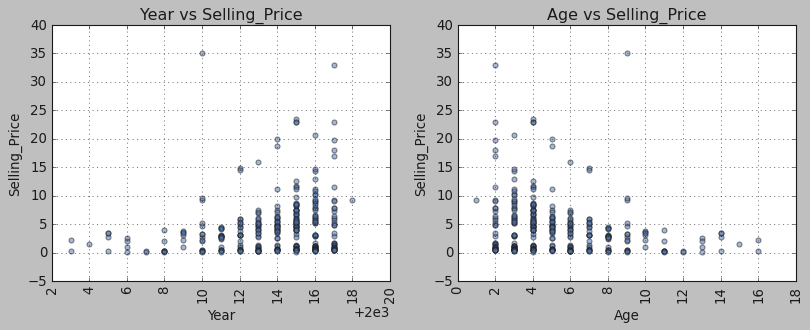

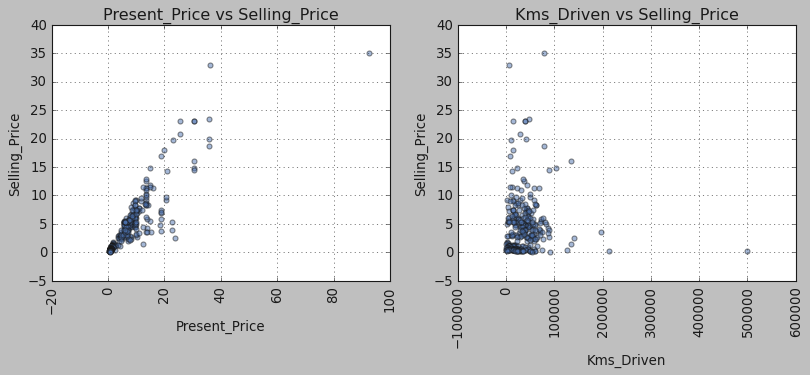

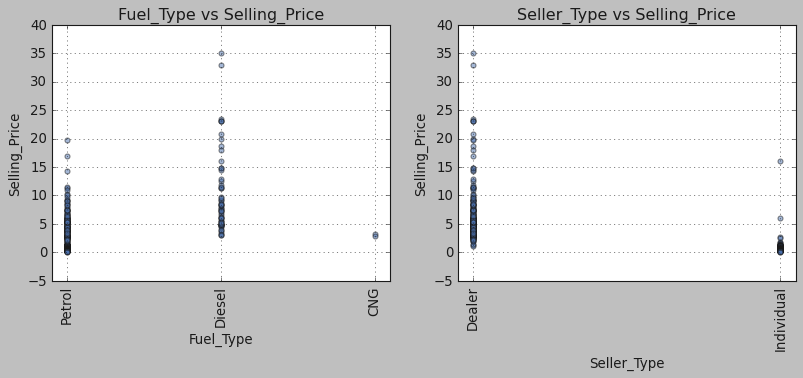

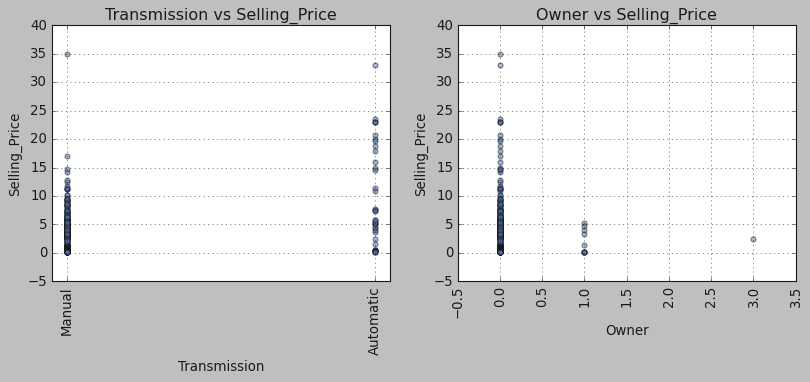

In [297]:
# a loop for getting scatter plot of all columns just for checking noises
plt.style.use("classic")
scatter_plot = list (df.drop (['Car_Name' , 'Selling_Price'] , axis = 1))               
i =  0
while i < 8:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df ["Selling_Price"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Selling_Price")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df ["Selling_Price"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Selling_Price")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.show ()

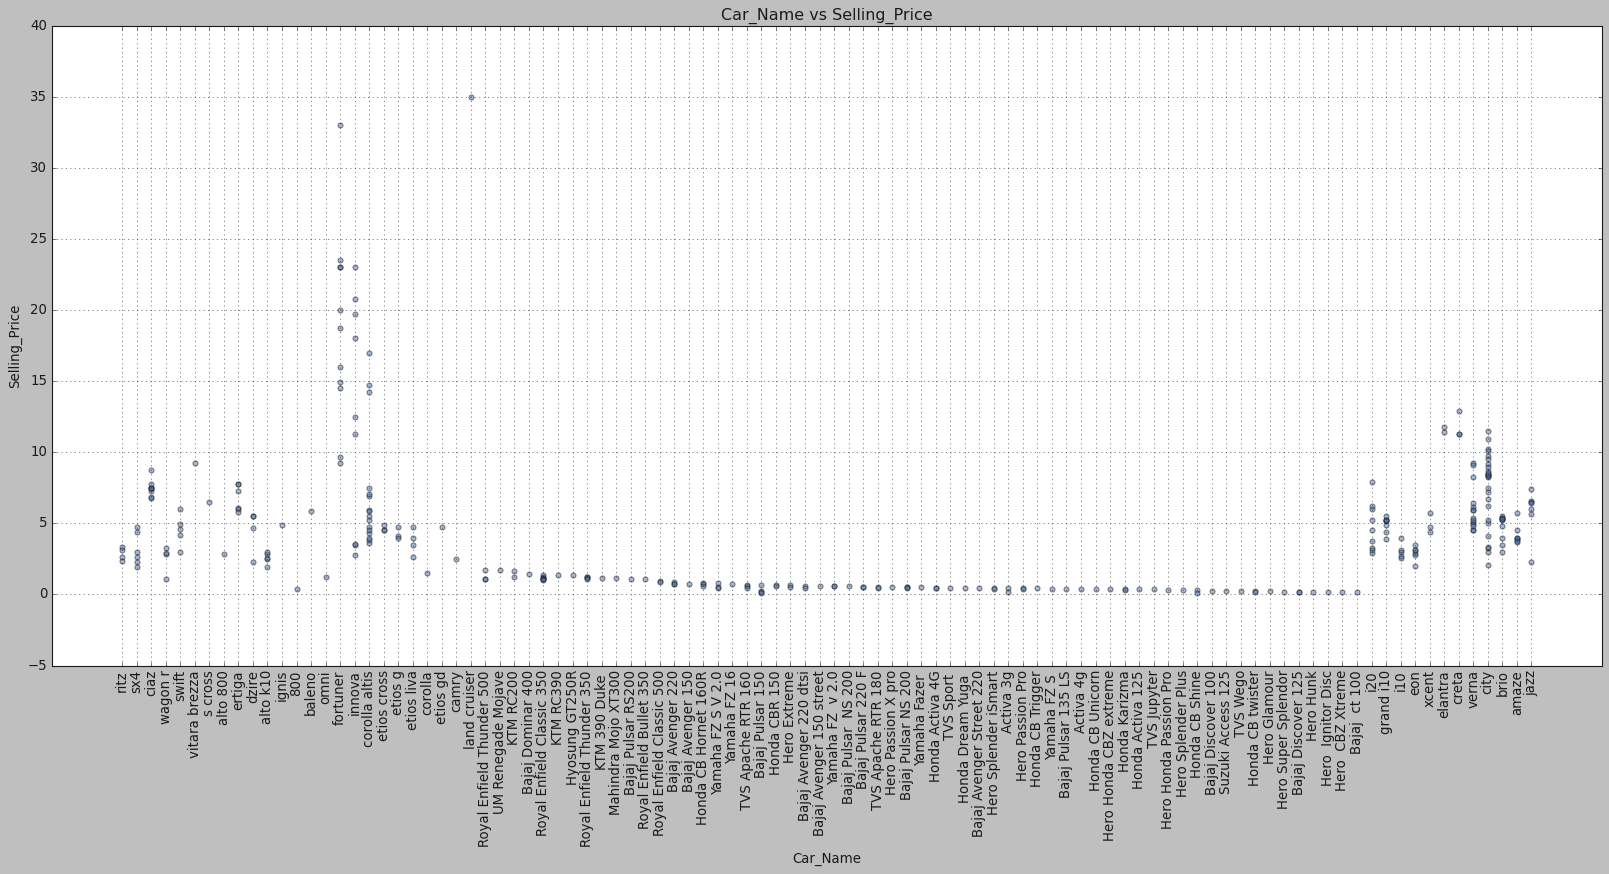

In [298]:
plt.style.use("classic")
plt.figure (figsize = (25 , 10))
plt.scatter (df ['Car_Name'] , df ["Selling_Price"] , alpha = .5)
plt.title ("Car_Name vs Selling_Price")
plt.xlabel ('Car_Name')
plt.xticks (rotation = 90)
plt.ylabel ("Selling_Price")
plt.grid ()
plt.show ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    suspicious samples which we should check
    <br> - Selling_Price > 30
    <br> - Kms_Driven >400 000
    <br> - Fuel_Type == CNG
    <br> - Owner == 3
    <br> - Present_Price > 80
</div>

In [299]:
n1 = df [df ["Selling_Price"] > 30]   
n1

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,9,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [300]:
n2 = df [df ["Car_Name"] == "land cruiser"]
n2

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [301]:
n3 = df [df ["Car_Name"] == "fortuner"]     
n3

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,fortuner,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,5,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0
67,fortuner,2010,9,9.25,20.45,59000,Diesel,Dealer,Manual,0
79,fortuner,2012,7,14.50,30.61,89000,Diesel,Dealer,Automatic,0
93,fortuner,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [302]:
n4 = df [df ["Kms_Driven"] > 400000]  
n4

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [303]:
n5 = df [df ["Fuel_Type"] == "CNG"]  
n5

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,wagon r,2015,4,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,8,2.95,7.74,49998,CNG,Dealer,Manual,0


In [304]:
n6 = df [df ["Owner"] > 2]    
n6

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,13,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [305]:
n7 = df [df ["Present_Price"] > 80]    
n7

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
these samples are all reasonable. Its all about prices, fuel type, number of owners and car kilometer driven. So they can be high numbers in real word and we have not any noises in this dataset.
</div>

In [306]:
df

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
we have some string values in dataset. These values are important and they have to be in modeling. So we transform them to numerical values.
</div>

In [307]:
df1_2 = df.copy()

In [308]:
df1_2['Fuel_Type'] = df1_2['Fuel_Type'].replace(['Petrol', 'Diesel', "CNG"], [2, 3 , 4])
df1_2['Seller_Type'] = df1_2['Seller_Type'].replace(['Dealer', 'Individual'], [2, 3])
df1_2['Transmission'] = df1_2['Transmission'].replace(['Manual', 'Automatic'], [2, 3 ])

In [309]:
df1_2

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5,3.35,5.59,27000,2,2,2,0
1,sx4,2013,6,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,2,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,8,2.85,4.15,5200,2,2,2,0
4,swift,2014,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,3,9.50,11.60,33988,3,2,2,0
297,brio,2015,4,4.00,5.90,60000,2,2,2,0
298,city,2009,10,3.35,11.00,87934,2,2,2,0
299,city,2017,2,11.50,12.50,9000,3,2,2,0


In [310]:
df1_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301.0,2.212625,0.425801,2.00,2.0,2.0,2.0,4.0
Seller_Type,301.0,2.352159,0.478439,2.00,2.0,2.0,3.0,3.0
Transmission,301.0,2.132890,0.340021,2.00,2.0,2.0,2.0,3.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
checking for duplicated values and remove them if there are any of them.
</div>

In [311]:
# check dublicated rows
df1_2.duplicated().sum()

2

In [312]:
df1_3 = df1_2[df1_2.duplicated()]
df1_3

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,3,7.75,10.79,43000,3,2,2,0
93,fortuner,2015,4,23.00,30.61,40000,3,2,3,0


In [313]:
# delete them from data frame
df1_2.drop_duplicates(inplace=True)

In [314]:
df1_2

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5,3.35,5.59,27000,2,2,2,0
1,sx4,2013,6,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,2,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,8,2.85,4.15,5200,2,2,2,0
4,swift,2014,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,3,9.50,11.60,33988,3,2,2,0
297,brio,2015,4,4.00,5.90,60000,2,2,2,0
298,city,2009,10,3.35,11.00,87934,2,2,2,0
299,city,2017,2,11.50,12.50,9000,3,2,2,0


# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Visualization & EDA </div>

In [315]:
df1_2.columns

Index(['Car_Name', 'Year', 'Age', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

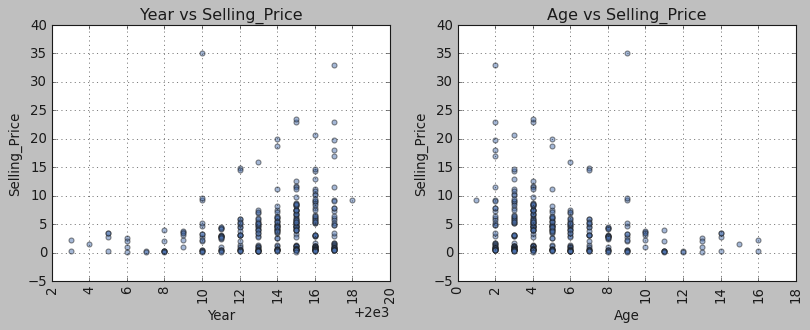

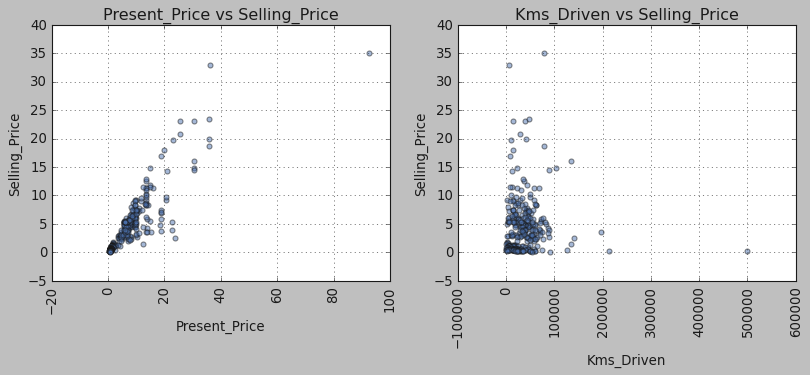

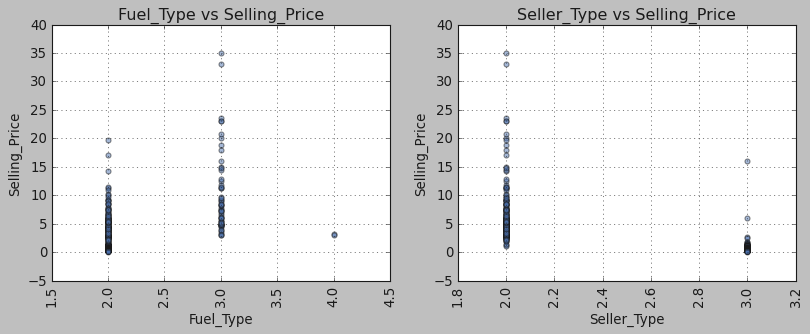

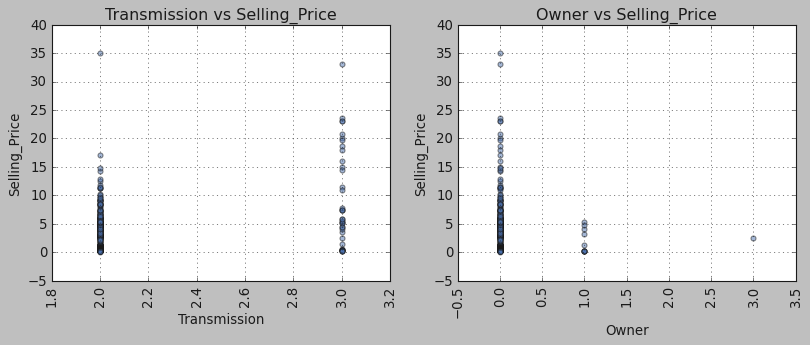

In [316]:
# Analyzing new values
scatter_plot = list (df.drop (['Car_Name' , 'Selling_Price'] , axis = 1))  
i = 0
while i < 8:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df1_2 [scatter_plot [i]] , df1_2 ["Selling_Price"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Selling_Price")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df1_2 [scatter_plot [i]] , df1_2 ["Selling_Price"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs Selling_Price")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.show ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    Here we have 8 scatter plot of all columns vs our target columns named Selling_Price
    <br> - We have some samples which are far away of data distribution but they are not noises as we checked in preprocessing section.
    <br> - We have 3 continuous (+ target) and 6 discrete columns in our dataset. 
    <br> - I got age column out of year column, so for making model and prediction we should remove year column. 
    <br> - Also we should remove car names too. They can't be in our algorithm.
    <br> - The peresent price column seems to have a good and positive correlation with target.
</div>

<AxesSubplot:>

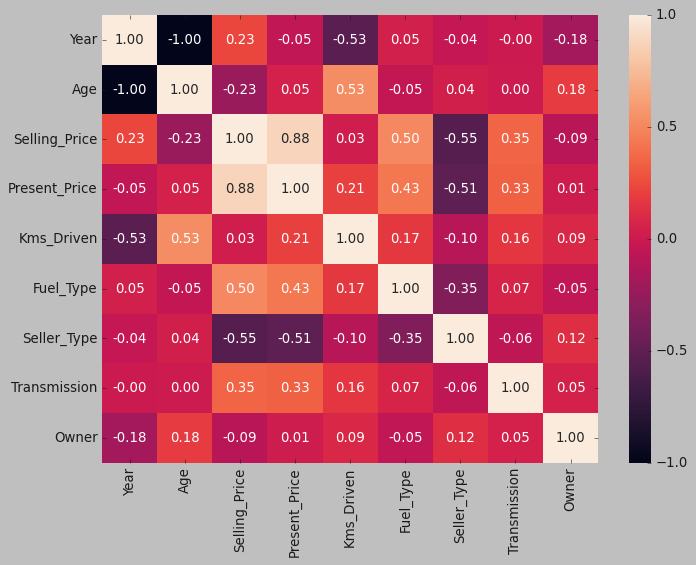

In [317]:
# analyse the correlation and relation between features and target
plt.figure (figsize = [10 , 7])
sns.heatmap (df1_2.corr() , annot=True , fmt=".2f")

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    Here are fetures with highest correlation with target. (descending order)
    <br> - present price
    <br> - seller type
    <br> - fuel type
    <br> - transmission
    <br> - age
    <br> - owner
    <br> - kilometers driven
</div>

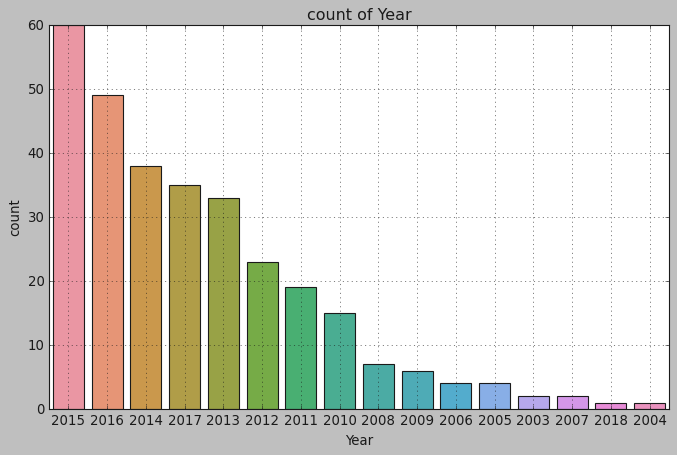

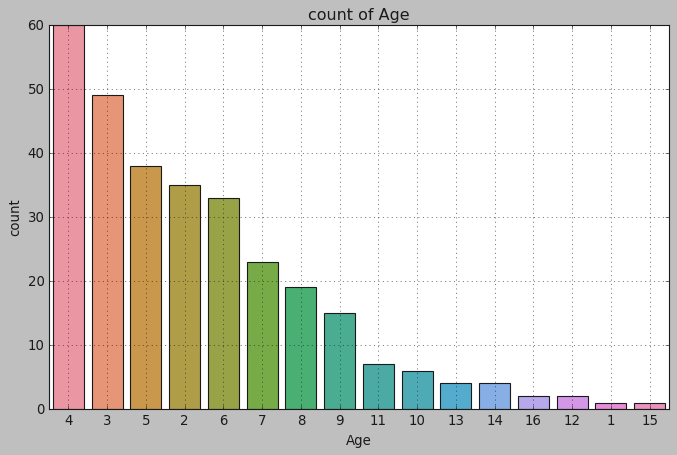

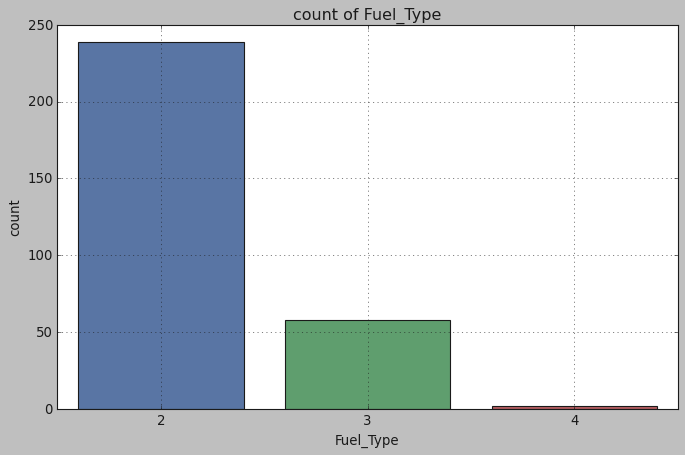

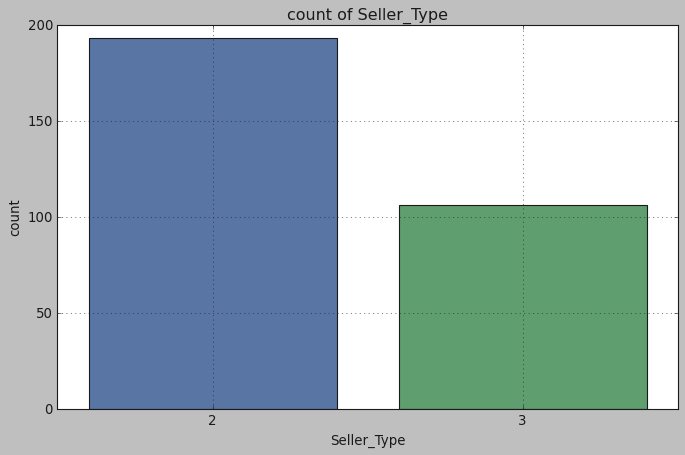

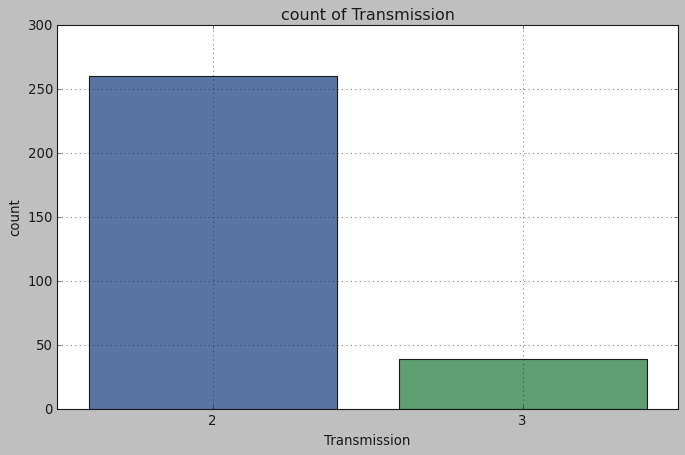

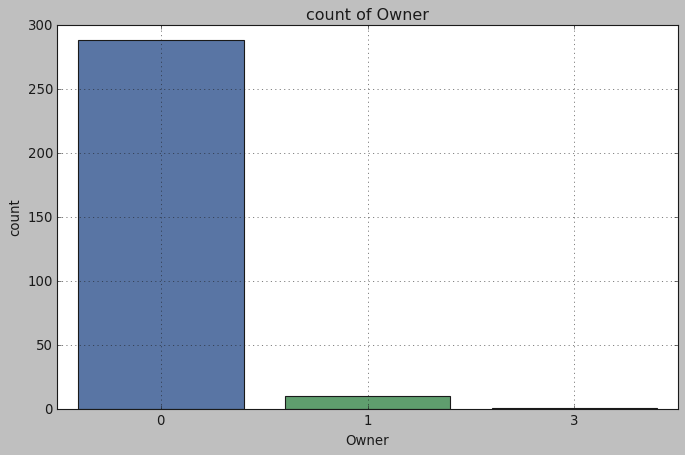

In [318]:
# making count plot for analyse
bar_plot = list (df1_2.drop (['Car_Name' , 'Selling_Price' , 'Present_Price' , 'Kms_Driven'] , axis = 1))  
for col in bar_plot :
    plt.figure (figsize = (10 , 6)) 
    sns.countplot (df1_2[col] , order = df1_2[col].value_counts().index)
    plt.title ("count of " + col)
    plt.grid ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    With this loop and barplots we can see number of samples in descrete features. (descending order)
    <br> - In first two plots we can see the age of the cars and easily consider the car models. 
    <br> - In other barplots we can see that most samples/cars are petrol, with dealer-seller type and manual transmission.
    <br> - Also we have some cars which are CNG and they are not alot.
    <br> - About the owners most of the samples stores in 0 values and we have some samples in 1 and 3 value but not many.
</div>

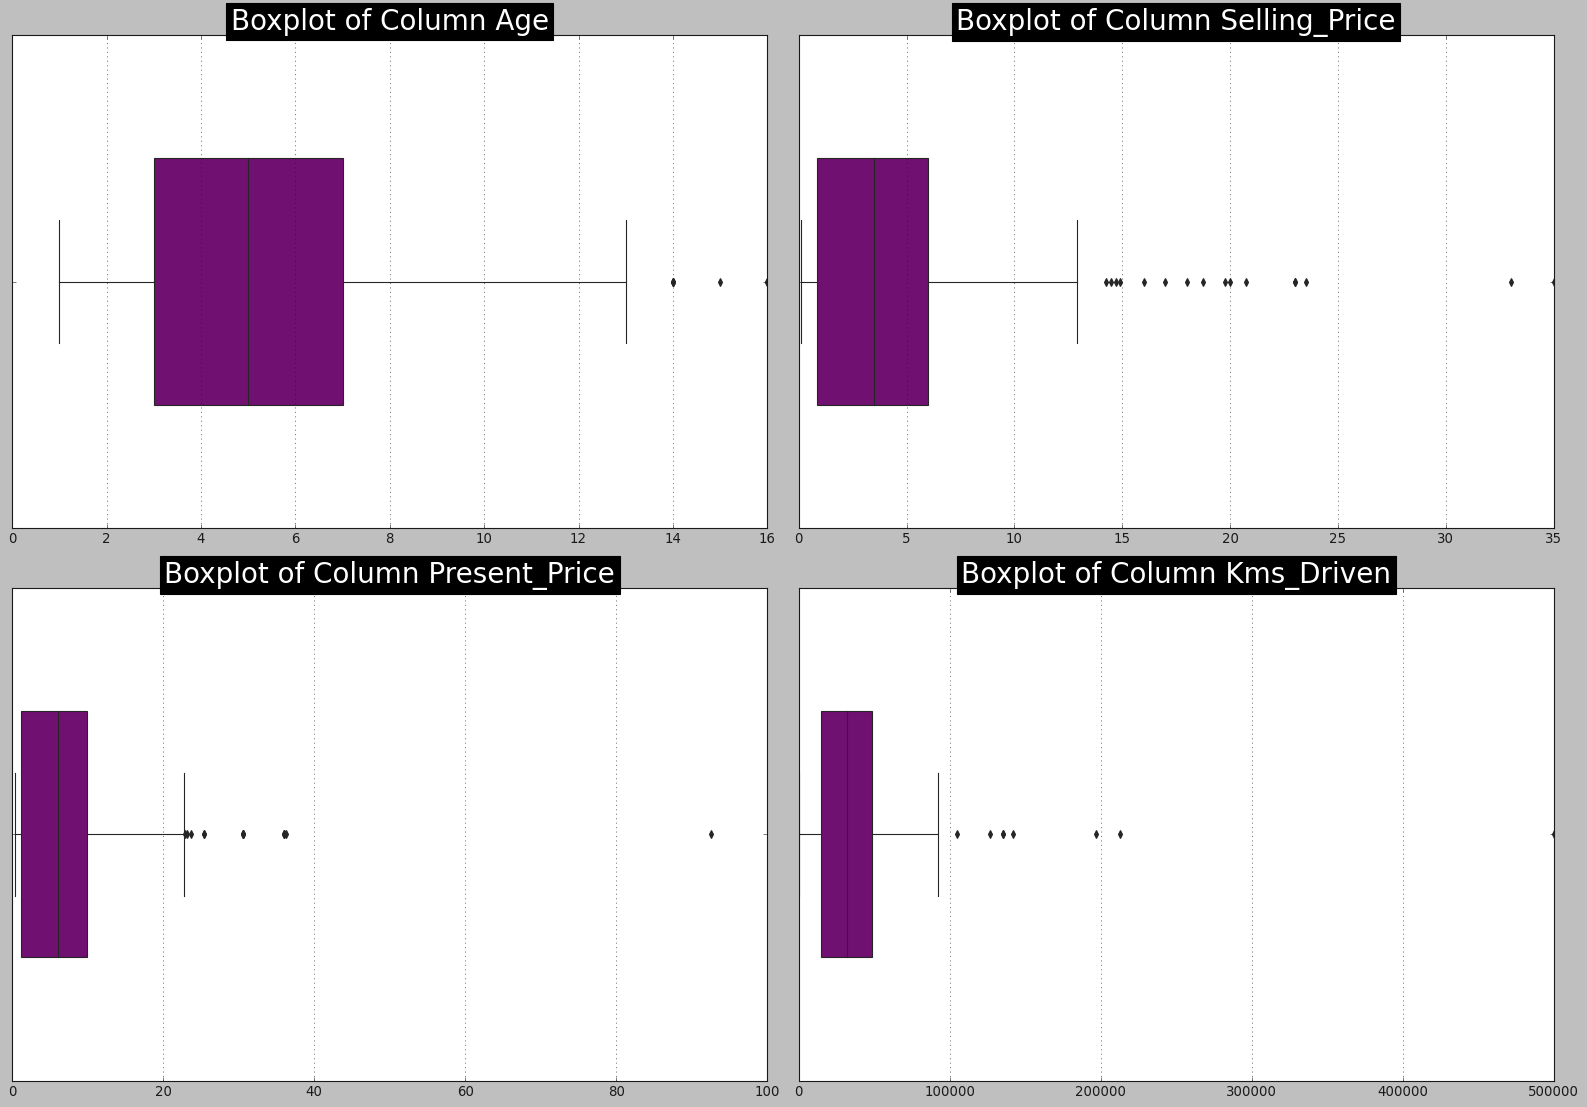

In [319]:
# box plot for other columns
columns_to_plot = ["Age" , "Selling_Price" , "Present_Price" , "Kms_Driven"]
n = len (columns_to_plot)
rows = n // 2 

fig , axs = plt.subplots (nrows = rows , ncols=2 , figsize = (20 , 7 * rows))
axs = axs.flatten () 

for ax , col in zip (axs , columns_to_plot):
    sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
    ax.grid (True)
    box = sns.boxplot (x = col , data = df1_2 , width = 0.5 , dodge = True , ax = ax , color = 'purple')
    box.set_title ("Boxplot of Column " + col , fontsize = 25 , backgroundcolor = 'black', color = 'white')
    box.set (xlabel = None)
    
plt.tight_layout()
plt.show()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    Here are box plot of target, 2 continuous columns and the age column :
    <br> - We can found distribution and outliers with this plots.
    <br> - As you can see we have so many outliers in three kms, present and selling price columns but they are valuable data and we shoud have them in our regression model.
    <br> - About the distribution we can have better sight and visualization at next plot.
</div>

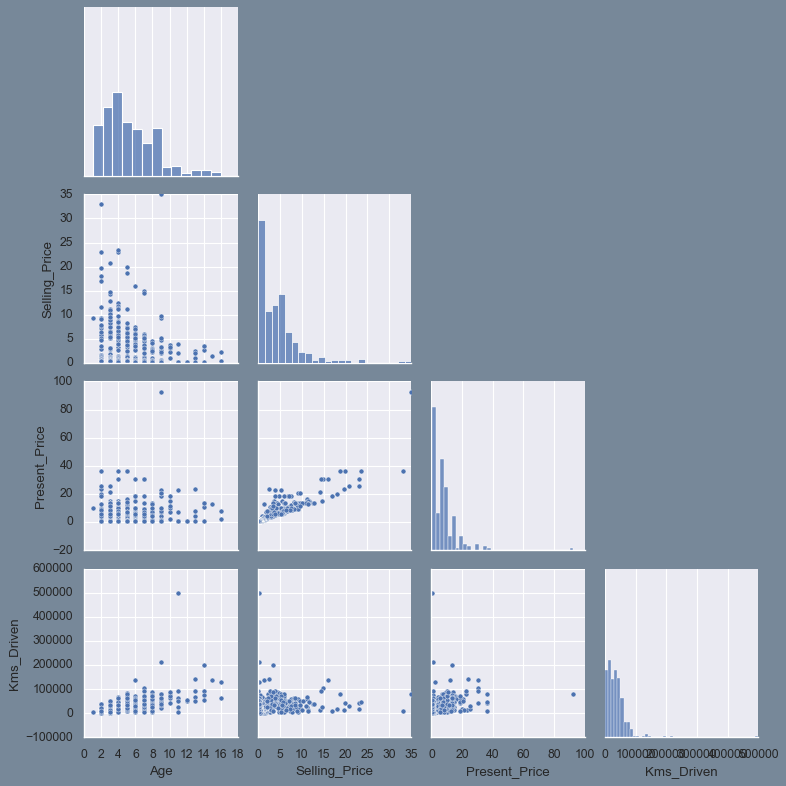

In [320]:
# a pair plot that we can have a quick look at the disturbution and relations between continuous features
sns.set_style('darkgrid')
sns.set(rc={'figure.facecolor':'LightSlateGrey'})
columns_to_plot = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']
sns.pairplot(df1_2 [columns_to_plot] , corner=True)

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    We can see continuous features disturbution in one view.
    <br> - in these plots we have just gamma and exponential distribution.
</div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Model (regression)</div>

In [321]:
df1_2

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5,3.35,5.59,27000,2,2,2,0
1,sx4,2013,6,4.75,9.54,43000,3,2,2,0
2,ciaz,2017,2,7.25,9.85,6900,2,2,2,0
3,wagon r,2011,8,2.85,4.15,5200,2,2,2,0
4,swift,2014,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,3,9.50,11.60,33988,3,2,2,0
297,brio,2015,4,4.00,5.90,60000,2,2,2,0
298,city,2009,10,3.35,11.00,87934,2,2,2,0
299,city,2017,2,11.50,12.50,9000,3,2,2,0


In [322]:
# removing useless columns  
df = df1_2.copy()
df.drop (['Car_Name' , 'Year'] , axis = 1 , inplace = True)

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 90%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Feature scaling (MinMaxScaler or StandardScaler)</div>

In [323]:
# normalizing 
norm = MinMaxScaler(feature_range=(0,1))
norm_data = norm.fit_transform(df.drop("Selling_Price", axis=1))
df_norm = pd.DataFrame(norm_data, columns=list(df.drop("Selling_Price", axis=1).columns), index=df.index)
df_norm['Selling_Price'] = df['Selling_Price']

<AxesSubplot:>

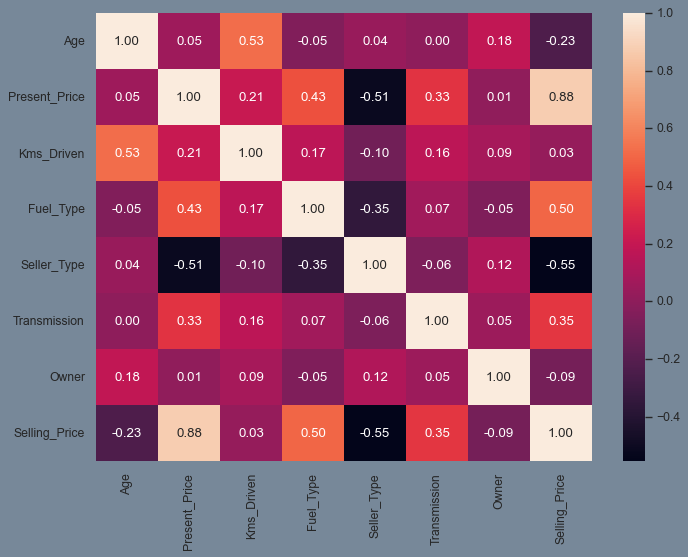

In [324]:
plt.figure (figsize = [10 , 7])
sns.heatmap (df_norm.corr() , annot=True , fmt=".2f")

In [325]:
# standard scaling
Scaler = StandardScaler ()
data_norm = Scaler.fit_transform (df.drop (columns = "Selling_Price"))
df_norm2 = pd.DataFrame(data_norm, columns=list(df.drop("Selling_Price", axis=1).columns), index=df.index)
df_norm2 ['Selling_Price'] = df ['Selling_Price']

<AxesSubplot:>

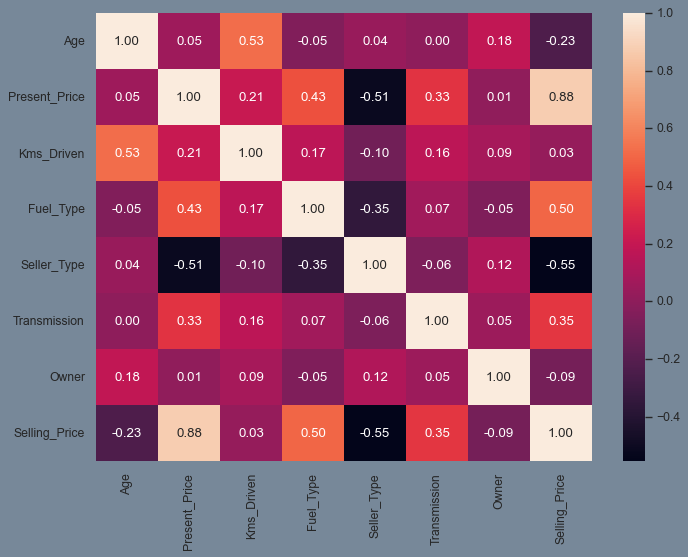

In [326]:
plt.figure (figsize = [10 , 7])
sns.heatmap (df_norm2.corr() , annot=True , fmt=".2f")

In [327]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,0.292308,0.193125,0.0,0.133333,0.266667,0.400000,1.0
Present_Price,299.0,0.078251,0.092847,0.0,0.009536,0.062635,0.103164,1.0
Kms_Driven,299.0,0.072906,0.078108,0.0,0.029029,0.063063,0.096864,1.0
Fuel_Type,299.0,0.103679,0.211149,0.0,0.000000,0.000000,0.000000,1.0
Seller_Type,299.0,0.354515,0.479168,0.0,0.000000,0.000000,1.000000,1.0
Transmission,299.0,0.130435,0.337346,0.0,0.000000,0.000000,0.000000,1.0
Owner,299.0,0.014493,0.082907,0.0,0.000000,0.000000,0.000000,1.0
Selling_Price,299.0,4.589632,4.984240,0.1,0.850000,3.510000,6.000000,35.0


In [328]:
df_norm2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,-1.217904e-16,1.001676,-1.516109,-0.824550,-0.132992,0.558566,3.670579
Present_Price,299.0,1.795294e-16,1.001676,-0.844215,-0.741334,-0.168472,0.268773,9.944291
Kms_Driven,299.0,-1.819429e-17,1.001676,-0.934965,-0.562691,-0.126233,0.307235,11.889211
Fuel_Type,299.0,6.700326e-16,1.001676,-0.491847,-0.491847,-0.491847,-0.491847,4.252094
Seller_Type,299.0,3.349235e-16,1.001676,-0.741096,-0.741096,-0.741096,1.349353,1.349353
Transmission,299.0,6.869273e-17,1.001676,-0.387298,-0.387298,-0.387298,-0.387298,2.581989
Owner,299.0,1.060096e-16,1.001676,-0.175101,-0.175101,-0.175101,-0.175101,11.906871
Selling_Price,299.0,4.589632e+00,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">There is no differences btw min max scaler method and standard scaling method for correlation</div>

In [329]:
# making features (normalized) and target 
x = df_norm.drop ("Selling_Price" , axis = 1)
y = df_norm.Selling_Price.values.reshape (-1 , 1)

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"> regression model with test size = 2 and no improvements</div>

In [330]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.2 , random_state = 42)

In [331]:
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)

In [332]:
print (regressor.intercept_) 
print (regressor.coef_)

[3.24108064]
[[-5.14612158 40.72465412 -4.67876723  2.44769686 -1.28967592  1.57661832
   2.10204083]]


In [333]:
print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  1.5410718122837632
Mean Squared Error :  6.673137446828259
Root Mean Squared Error :  2.583241654748595
R2 Score :  0.7410829335731297


In [334]:
result = regressor.score (x_test , y_test)  
result

0.7410829335731297

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">searching for best test size </div>

In [335]:
r2_score = []
for i in range(10 , 30):
    i = i / 100
    
    x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = i , random_state = 42)
    regressor = LinearRegression()
    regressor.fit (x_train , y_train)
    y_pred = regressor.predict (x_test)
    
    score = metrics.r2_score (y_test , y_pred)
    r2_score.append (score)

In [336]:
r2_score

[0.8218769988553792,
 0.8106296460467168,
 0.8116779185605297,
 0.780587886901347,
 0.76162313321008,
 0.7665423724523195,
 0.7684167728548856,
 0.7714142881387345,
 0.7404546202528088,
 0.7401802031374638,
 0.7410829335731297,
 0.7468325351260408,
 0.749053445859814,
 0.7426686012563142,
 0.7446798139254787,
 0.7498219400742131,
 0.7632351111008735,
 0.7657994721426571,
 0.7655068621088966,
 0.7699732344805785]

In [337]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = .1 , random_state = 42)
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)

print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  1.3166497753024111
Mean Squared Error :  6.731612584390763
Root Mean Squared Error :  2.5945351383997024
R2 Score :  0.8218769988553792


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"> test size 0.1 have the best R2 score so we continue with it </div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Cross Validation</div>

In [338]:
kfold_validation = KFold (10)

In [339]:
result2 = cross_val_score (regressor , x , y , cv = kfold_validation)
result2

array([ 6.66018244e-01,  8.80067092e-01,  7.37639844e-01,  8.28775455e-01,
       -5.08777350e+01, -9.33591306e+02,  1.84139960e-01,  7.62170381e-01,
        8.35766696e-01,  8.65008578e-01])

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"> There are some parts in dataset which have bad scores. I want to remove these parts for checking the resaults.</div>

In [340]:
df_cross = df_norm.copy()

In [341]:
df_cross2 = df_cross.iloc [:148]
df_cross2

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0,3.35
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0,4.75
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0,7.25
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0,2.85
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0,4.60
...,...,...,...,...,...,...,...,...
145,0.400000,0.005310,0.037037,0.0,1.0,0.0,0.0,0.60
146,0.266667,0.005061,0.029029,0.0,1.0,0.0,0.0,0.55
147,0.200000,0.005635,0.115115,0.0,1.0,0.0,0.0,0.55
148,0.533333,0.006719,0.089089,0.0,1.0,0.0,0.0,0.52


In [342]:
df_cross3 = df_cross.iloc [209:]
df_cross3

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
211,0.200000,0.156805,0.086156,0.5,0.0,0.0,0.0,11.75
212,0.133333,0.143910,0.044386,0.0,0.0,0.0,0.0,11.25
213,0.466667,0.070113,0.062270,0.0,0.0,0.0,0.0,2.90
214,0.066667,0.058301,0.039267,0.0,0.0,0.0,0.0,5.25
215,0.400000,0.098396,0.071271,0.0,0.0,0.0,0.0,4.50
...,...,...,...,...,...,...,...,...
296,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0,9.50
297,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0,4.00
298,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0,3.35
299,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0,11.50


In [343]:
df_cross4 = df_cross2.append (df_cross3)
df_cross4.reset_index(drop = True , inplace = True)
df_cross4

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0,3.35
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0,4.75
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0,7.25
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0,2.85
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0,4.60
...,...,...,...,...,...,...,...,...
233,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0,9.50
234,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0,4.00
235,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0,3.35
236,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0,11.50


In [344]:
x_cross = df_cross4.drop ("Selling_Price" , axis = 1)
y_cross = df_cross4.Selling_Price.values.reshape (-1 , 1)
    
x_train , x_test , y_train , y_test = train_test_split (x_cross , y_cross , test_size = .1 , random_state = 42)
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)
    
print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  0.5902990334646075
Mean Squared Error :  0.478972165878586
Root Mean Squared Error :  0.692078150123659
R2 Score :  0.941937664102742


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"> As you can see we had a very nice score increasing.</div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;"> feature engineering (manual)</div>

In [345]:
x_fe = x_cross.copy()
x_fe

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
233,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0
234,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0
235,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0
236,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">In this part i want to extract some extra data from my features without any library by combining or exponentiation of the features. </div>

In [346]:
# setting a loop if any feature ** 2 increase r2 score => add it to data frame
d = 2
r2_score = 0.941937664102742        #highest r2 score upto now by cross validation
for col in x_fe :
        new_value = x_fe [col] ** d
        column_index = x_fe.columns.get_loc(col)
        x_fe.insert (len (x_fe.columns) , col + str(d) , new_value)
        x_train , x_test , y_train , y_test = train_test_split (x_fe , y_cross , test_size = 0.1 , random_state = 42)
        regressor1 = LinearRegression()
        regressor1.fit (x_train , y_train)
        y_pred = regressor1.predict (x_test)
        print ("R2 Score : " , col , metrics.r2_score (y_test , y_pred))
        r2_score2 = metrics.r2_score (y_test , y_pred)
        if round (r2_score2 * 10000) > round (r2_score * 10000):
            r2_score = r2_score2
        else :
            del x_fe [col + str(d)]

R2 Score :  Age 0.9067553191925839
R2 Score :  Present_Price 0.9524228654050244
R2 Score :  Kms_Driven 0.9476024041111162
R2 Score :  Fuel_Type 0.9488637637075681
R2 Score :  Seller_Type 0.9524228654050242
R2 Score :  Transmission 0.9524228654050244
R2 Score :  Owner 0.9528716228836819


In [347]:
print ('features : ' , list (x_fe.columns))
print ('r2 score : ' , r2_score)

features :  ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Present_Price2', 'Owner2']
r2 score :  0.9528716228836819


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Some features by power of 2 increased the model score. But lets found what more exponentiation  does. </div>

In [348]:
for d in range (4 , 10):
    for col in x_fe :
            column_index = x_fe.columns.get_loc(col)
            if column_index < 7 :
                new_value = x_fe [col] ** d
                x_fe.insert (len (x_fe.columns) , col + str(d) , new_value)
                x_train , x_test , y_train , y_test = train_test_split (x_fe , y_cross , test_size = 0.1 , random_state = 42)
                regressor1 = LinearRegression()
                regressor1.fit (x_train , y_train)
                y_pred = regressor1.predict (x_test)
                print ("R2 Score : " , col , metrics.r2_score (y_test , y_pred))
                r2_score2 = metrics.r2_score (y_test , y_pred)
                if round (r2_score2 * 10000) > round (r2_score * 10000):
                    r2_score = r2_score2
                else :
                    del x_fe [col + str(d)]

R2 Score :  Age 0.9170774666736304
R2 Score :  Present_Price 0.9481234634348087
R2 Score :  Kms_Driven 0.9485663431632716
R2 Score :  Fuel_Type 0.9498806959564098
R2 Score :  Seller_Type 0.9528716228836817
R2 Score :  Transmission 0.9528716228836825
R2 Score :  Owner 0.9528716228836823
R2 Score :  Age 0.9179711453408161
R2 Score :  Present_Price 0.9481009063851673
R2 Score :  Kms_Driven 0.9491056808024004
R2 Score :  Fuel_Type 0.949880695956409
R2 Score :  Seller_Type 0.9528716228836817
R2 Score :  Transmission 0.9528716228836825
R2 Score :  Owner 0.9528716228836823
R2 Score :  Age 0.9200835862196163
R2 Score :  Present_Price 0.9481050564235329
R2 Score :  Kms_Driven 0.9495313988494458
R2 Score :  Fuel_Type 0.9498806959564096
R2 Score :  Seller_Type 0.9528716228836817
R2 Score :  Transmission 0.9528716228836825
R2 Score :  Owner 0.9528716228836817
R2 Score :  Age 0.9226811054386301
R2 Score :  Present_Price 0.9481100946572159
R2 Score :  Kms_Driven 0.949838739371294
R2 Score :  Fuel_Ty

In [349]:
print ('features : ' , list (x_fe.columns))
print ('r2 score : ' , r2_score)

features :  ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Present_Price2', 'Owner2']
r2 score :  0.9528716228836819


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">More exponentiation had no effect, so we continue with combining features</div>

In [350]:
new_df = x_fe.copy()
new_df.insert (9 , "Selling_Price" , y_cross) 
new_df

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price2,Owner2,Selling_Price
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0,0.003261,0.0,3.35
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0,0.009983,0.0,4.75
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0,0.010665,0.0,7.25
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0,0.001723,0.0,2.85
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0,0.005038,0.0,4.60
...,...,...,...,...,...,...,...,...,...,...
233,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0,0.014942,0.0,9.50
234,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0,0.003656,0.0,4.00
235,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0,0.013395,0.0,3.35
236,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0,0.017421,0.0,11.50


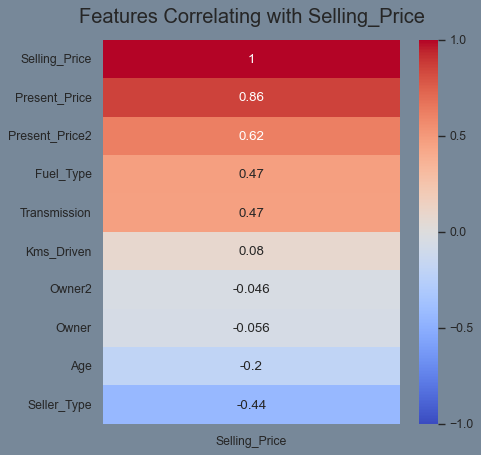

In [351]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(new_df.corr()[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Selling_Price', fontdict={'fontsize':18}, pad=16);

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;"> In this plot which shows correlation of features with target, present price have highest correlation with target, so i want to check the combination of this column with which column increase my model score.</div>

In [352]:
x_fe2 = x_fe.copy()
x_fe2

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price2,Owner2
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0,0.003261,0.0
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0,0.009983,0.0
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0,0.010665,0.0
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0,0.001723,0.0
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0,0.005038,0.0
...,...,...,...,...,...,...,...,...,...
233,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0,0.014942,0.0
234,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0,0.003656,0.0
235,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0,0.013395,0.0
236,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0,0.017421,0.0


In [353]:
# A function for checking which feature can increase the score more ...
def combination (col):
    new_value = x_fe2 ['Present_Price'] * x_fe2 [col]
    x_fe2.insert (len (x_fe2.columns) , 'Present_Price' + "_" + col , new_value)
    x_train , x_test , y_train , y_test = train_test_split (x_fe2 , y_cross , test_size = 0.1 , random_state = 42)
    regressor1 = LinearRegression()
    regressor1.fit (x_train , y_train)
    y_pred = regressor1.predict (x_test)
    print ("R2 Score : " , metrics.r2_score (y_test , y_pred))
    r2_score2 = metrics.r2_score (y_test , y_pred)

In [354]:
for col in x_fe2.columns:
    combination (col)
    print (col)

R2 Score :  0.977105357439696
Age
R2 Score :  0.9771053574396957
Present_Price
R2 Score :  0.9767963884116126
Kms_Driven
R2 Score :  0.967991404687573
Fuel_Type
R2 Score :  0.968392644017137
Seller_Type
R2 Score :  0.9718860228782802
Transmission
R2 Score :  0.9718966398542795
Owner
R2 Score :  0.9739369359739019
Present_Price2
R2 Score :  0.9739369359739017
Owner2


In [355]:
x_fe2 = x_fe.copy()
combination ('Age')

R2 Score :  0.977105357439696


In [356]:
x_train , x_test , y_train , y_test = train_test_split (x_fe2 , y_cross , test_size = .1 , random_state = 42)
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)
    
print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  0.3359521568776498
Mean Squared Error :  0.18886419853188818
Root Mean Squared Error :  0.4345850877928144
R2 Score :  0.977105357439696


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">I got very good resaults in this section by extracting new data from our data frame. Now, lets check PolynomialFeatures method if it can do it better or not. </div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 90%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;"> feature engineering (PolynomialFeatures method)</div>

In [357]:
x_fe3 = x_cross.copy()
x_fe3

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.266667,0.057109,0.053053,0.0,0.0,0.0,0.0
1,0.333333,0.099913,0.085085,0.5,0.0,0.0,0.0
2,0.066667,0.103273,0.012813,0.0,0.0,0.0,0.0
3,0.466667,0.041504,0.009409,0.0,0.0,0.0,0.0
4,0.266667,0.070980,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
233,0.133333,0.122237,0.067043,0.5,0.0,0.0,0.0
234,0.200000,0.060468,0.119119,0.0,0.0,0.0,0.0
235,0.600000,0.115735,0.175043,0.0,0.0,0.0,0.0
236,0.066667,0.131990,0.017017,0.5,0.0,0.0,0.0


In [358]:
poly = PolynomialFeatures(degree = 2 , interaction_only = False , include_bias = False)
x_poly = poly.fit_transform (x_fe3)
x_poly = pd.DataFrame(x_poly , columns = poly.get_feature_names_out ())
x_poly.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age^2', 'Age Present_Price', 'Age Kms_Driven',
       'Age Fuel_Type', 'Age Seller_Type', 'Age Transmission', 'Age Owner',
       'Present_Price^2', 'Present_Price Kms_Driven',
       'Present_Price Fuel_Type', 'Present_Price Seller_Type',
       'Present_Price Transmission', 'Present_Price Owner', 'Kms_Driven^2',
       'Kms_Driven Fuel_Type', 'Kms_Driven Seller_Type',
       'Kms_Driven Transmission', 'Kms_Driven Owner', 'Fuel_Type^2',
       'Fuel_Type Seller_Type', 'Fuel_Type Transmission', 'Fuel_Type Owner',
       'Seller_Type^2', 'Seller_Type Transmission', 'Seller_Type Owner',
       'Transmission^2', 'Transmission Owner', 'Owner^2'],
      dtype='object')

In [359]:
poly2 = PolynomialFeatures(degree = 3 , interaction_only = False , include_bias = False)
x_poly2 = poly2.fit_transform (x_fe3)
x_poly2 = pd.DataFrame(x_poly2 , columns = poly2.get_feature_names_out ())
x_poly2.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age^2', 'Age Present_Price', 'Age Kms_Driven',
       ...
       'Seller_Type^3', 'Seller_Type^2 Transmission', 'Seller_Type^2 Owner',
       'Seller_Type Transmission^2', 'Seller_Type Transmission Owner',
       'Seller_Type Owner^2', 'Transmission^3', 'Transmission^2 Owner',
       'Transmission Owner^2', 'Owner^3'],
      dtype='object', length=119)

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">By this method i extracted some new features with 2 and 3 degree, as you can see we have much more features with 3 degree so i want to continue and go for feature selection with x_poly2 which have much more fetures. </div>

now we use select k best methof for feature selection 

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;"> feature selection (SelectKBest method)</div>

In [360]:
len (x_poly2.columns)

119

In [361]:
# making a new dataframe which stores the k values and r2 score to find the best resaults and features
score_list = []
for i in range (5 , 119):
    df_selection = SelectKBest (f_regression , k = i).fit_transform(x_poly2 , y_cross)
    x_train , x_test , y_train , y_test = train_test_split (df_selection , y_cross , test_size = .1 , random_state = 42)
    regressor = LinearRegression()
    regressor.fit (x_train , y_train)
    y_pred = regressor.predict (x_test)
    metrics.r2_score (y_test , y_pred)
    score = metrics.r2_score (y_test , y_pred)
    score_list.append((i, score))
    
df_scores = pd.DataFrame(score_list, columns=['k_value', 'r2_score'])
df_scores

,k_value,r2_score
0,5,0.673729
1,6,0.673729
2,7,0.673729
3,8,0.631987
4,9,0.734363
...,...,...
109,114,0.968867
110,115,0.968688
111,116,0.970173
112,117,0.970173


In [362]:
max_score_row = df_scores.loc[df_scores['r2_score'].idxmax()]
print(max_score_row)

k_value     38.000000
r2_score     0.973659
Name: 33, dtype: float64


In [363]:
selection = SelectKBest (f_regression , k = 38)
df_selection = selection.fit_transform(x_poly2 , y_cross)

x_train , x_test , y_train , y_test = train_test_split (df_selection , y_cross , test_size = .1 , random_state = 42)
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)
metrics.r2_score (y_test , y_pred)

print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  0.3327748887976332
Mean Squared Error :  0.21729517433478804
Root Mean Squared Error :  0.4661493047670328
R2 Score :  0.9736588756093233


In [364]:
selection.get_feature_names_out()

array(['Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission',
       'Age Present_Price', 'Age Fuel_Type', 'Age Seller_Type',
       'Present_Price^2', 'Present_Price Kms_Driven',
       'Present_Price Fuel_Type', 'Present_Price Transmission',
       'Kms_Driven Fuel_Type', 'Fuel_Type^2', 'Fuel_Type Transmission',
       'Seller_Type^2', 'Transmission^2', 'Age Present_Price^2',
       'Age Present_Price Kms_Driven', 'Age Present_Price Fuel_Type',
       'Age Present_Price Transmission', 'Age Fuel_Type Transmission',
       'Age Seller_Type^2', 'Present_Price^3',
       'Present_Price^2 Kms_Driven', 'Present_Price^2 Fuel_Type',
       'Present_Price^2 Transmission', 'Present_Price Kms_Driven^2',
       'Present_Price Kms_Driven Fuel_Type',
       'Present_Price Kms_Driven Transmission',
       'Present_Price Fuel_Type^2',
       'Present_Price Fuel_Type Transmission',
       'Present_Price Transmission^2', 'Kms_Driven Fuel_Type^2',
       'Kms_Driven Fuel_Type Transmission', 'Fuel

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">
    i found that the manual way for feature engineering is better (in this dataset) becauase of : 
    <br> - the reaults ( metrics , errors and scores ) was better by manual way
    <br> - We had much less dimensions in manual way. Its a good point.
    <br> - In maual way, the 7 main features of the dataset was in model.
</div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Final Visualization</div>

In [365]:
# our final model
x_train , x_test , y_train , y_test = train_test_split (x_fe2 , y_cross , test_size = .1 , random_state = 42)
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)
    
print ("Mean Absolute Error : " , metrics.mean_absolute_error (y_test , y_pred))
print ("Mean Squared Error : " , metrics.mean_squared_error (y_test , y_pred))
print ("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error (y_test , y_pred)))
print ("R2 Score : " , metrics.r2_score (y_test , y_pred))

Mean Absolute Error :  0.3359521568776498
Mean Squared Error :  0.18886419853188818
Root Mean Squared Error :  0.4345850877928144
R2 Score :  0.977105357439696


In [366]:
len (x_fe2.columns)

10

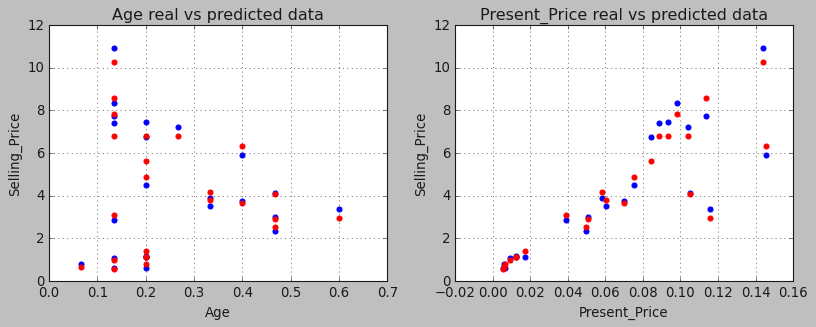

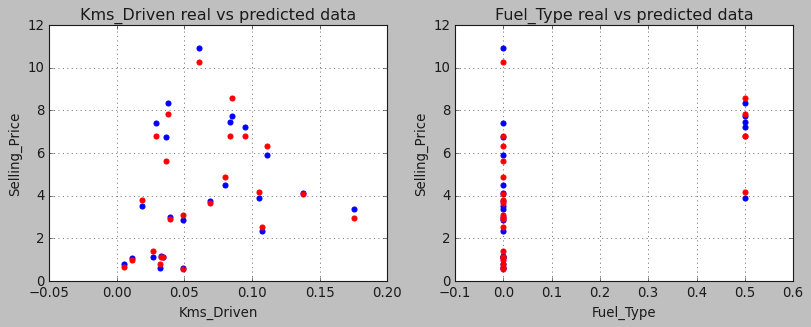

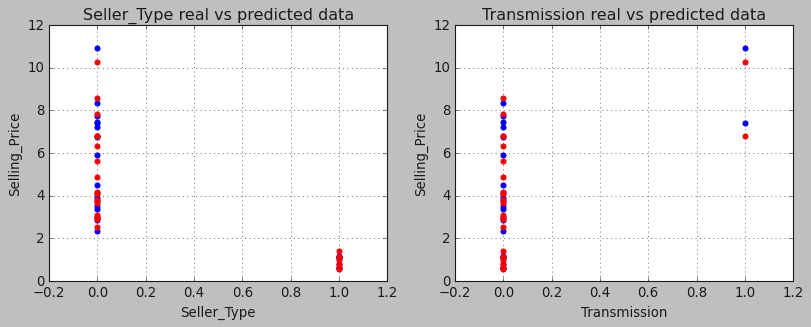

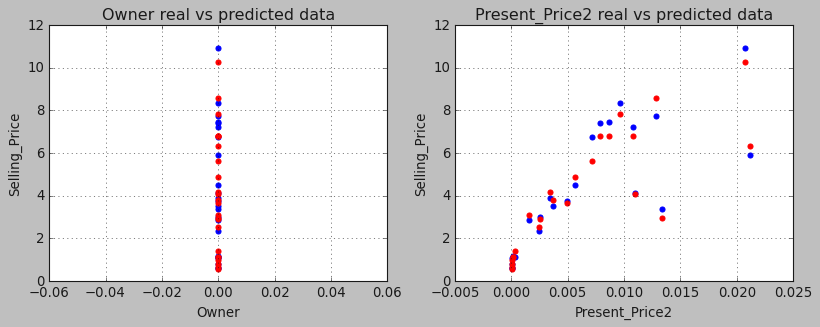

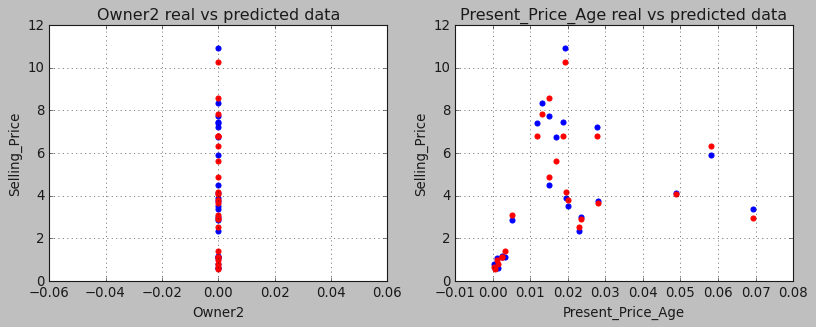

In [367]:
# Analyzing new values
plt.style.use('classic')

scatter_plot = list (x_fe2.columns)  
i = 0
while i < 9:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (x_test [scatter_plot [i]] , y_test , color = 'blue')
    plt.scatter (x_test [scatter_plot [i]] , y_pred , color = 'red')
    plt.title (scatter_plot [i] + " real vs predicted data")
    plt.xlabel (scatter_plot [i])
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (x_test [scatter_plot [i]] , y_test , color = 'blue')
    plt.scatter (x_test [scatter_plot [i]] , y_pred , color = 'red')
    plt.title (scatter_plot [i] + " real vs predicted data")
    plt.xlabel (scatter_plot [i])
    plt.ylabel ("Selling_Price")
    plt.grid ()
    i += 1
    plt.show ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Blue points are real samples and red points are predicted ones. In general by these plots i can say the model worked very nice and prediction was completely acceptable. </div>

In [368]:
x_test.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Present_Price2', 'Owner2',
       'Present_Price_Age'],
      dtype='object')

In [369]:
len (x_test.columns)

10

In [370]:
x_test.insert (10 , "y_test" , y_test)
x_test.insert (11 , "y_pred" , y_pred)

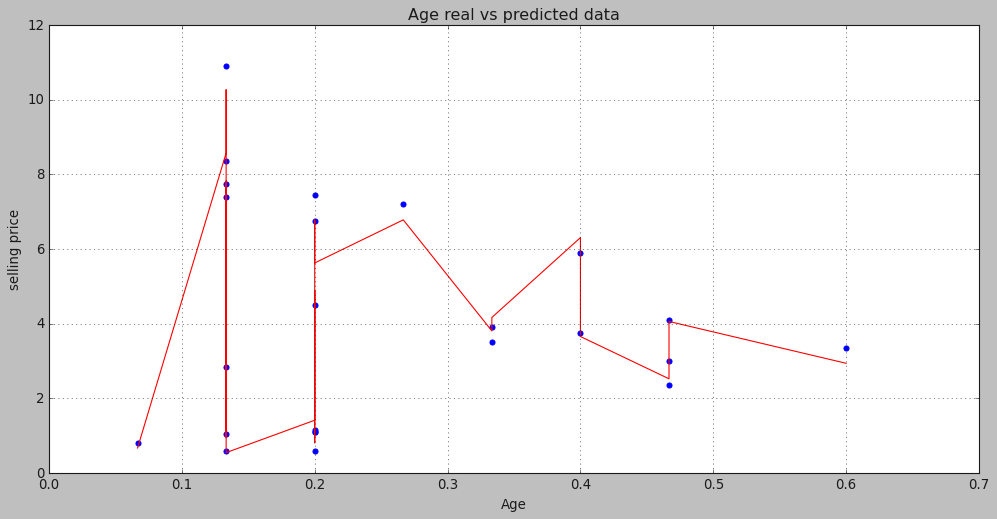

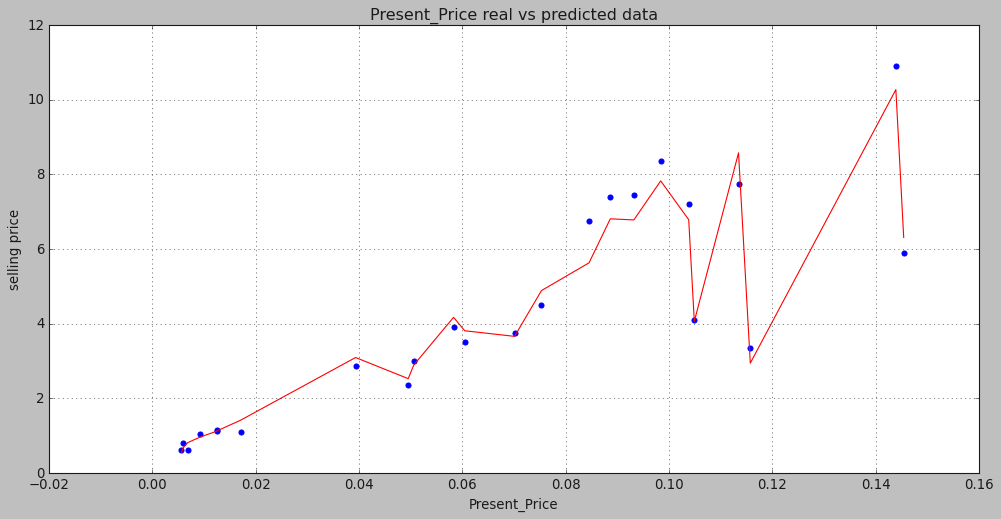

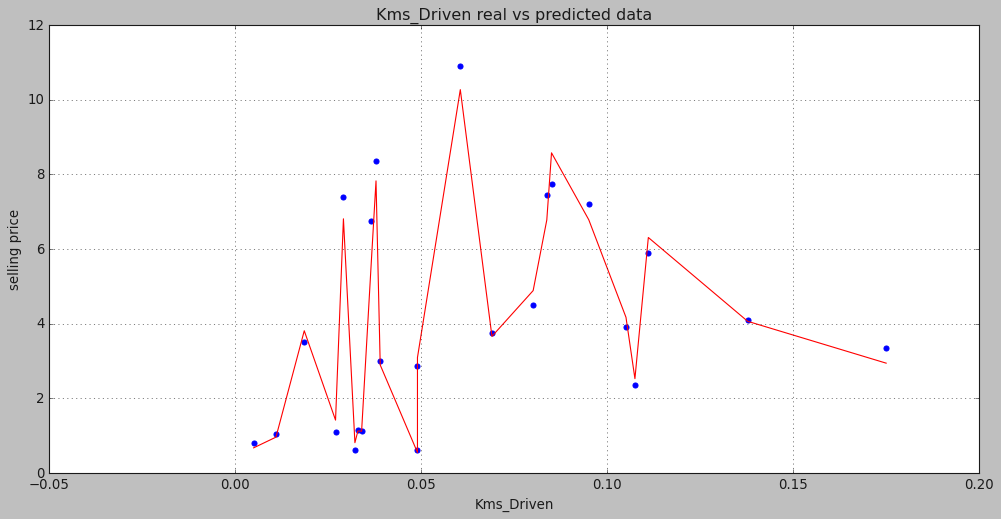

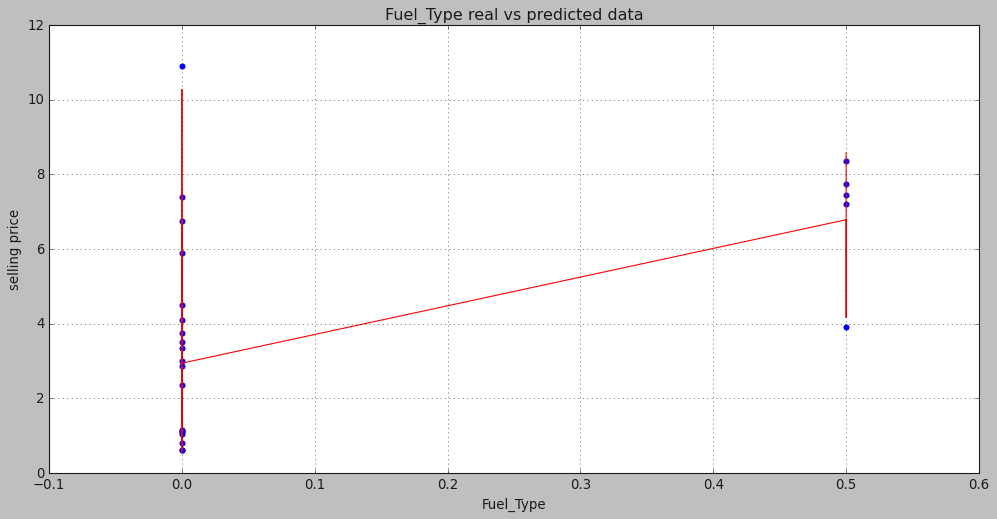

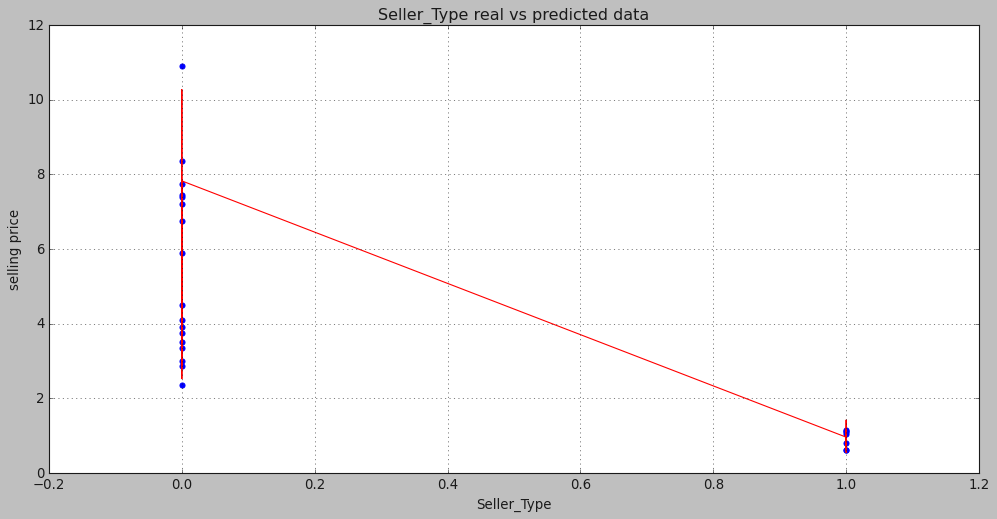

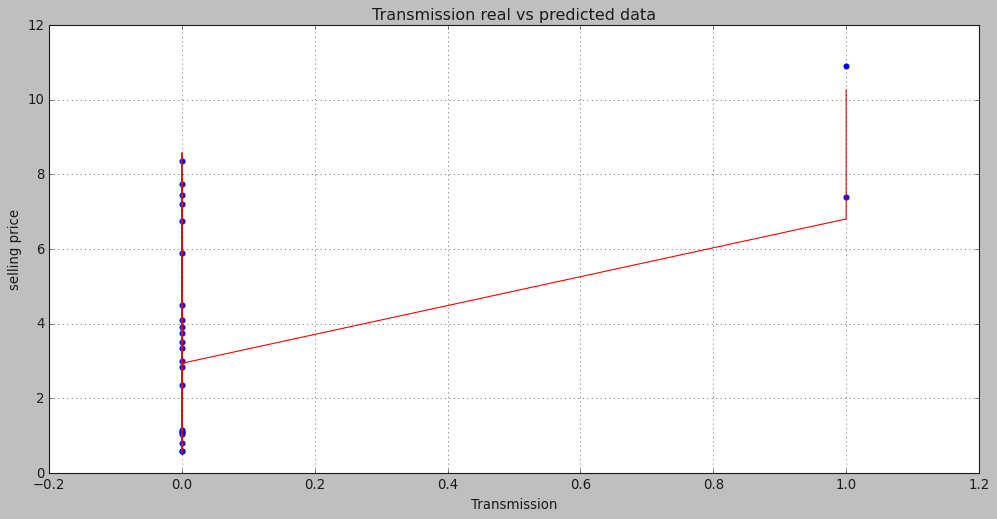

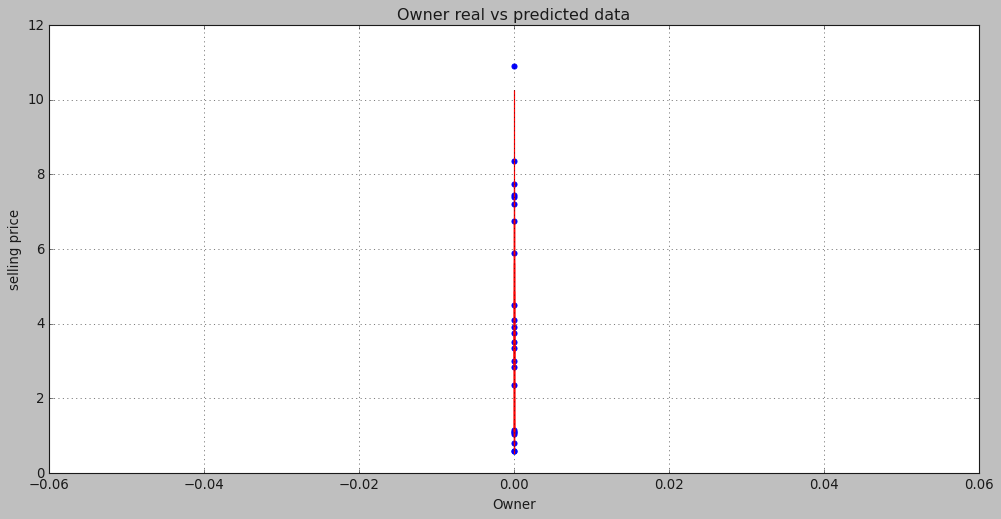

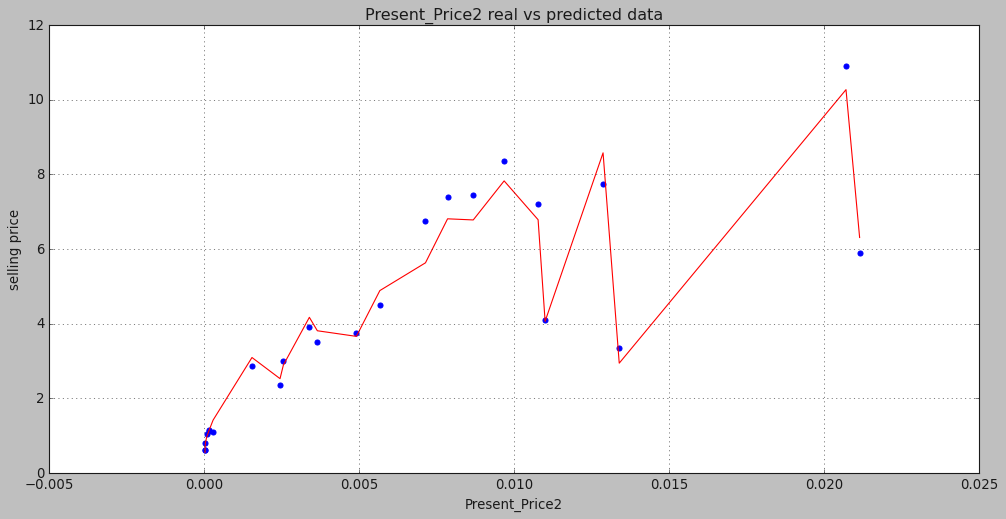

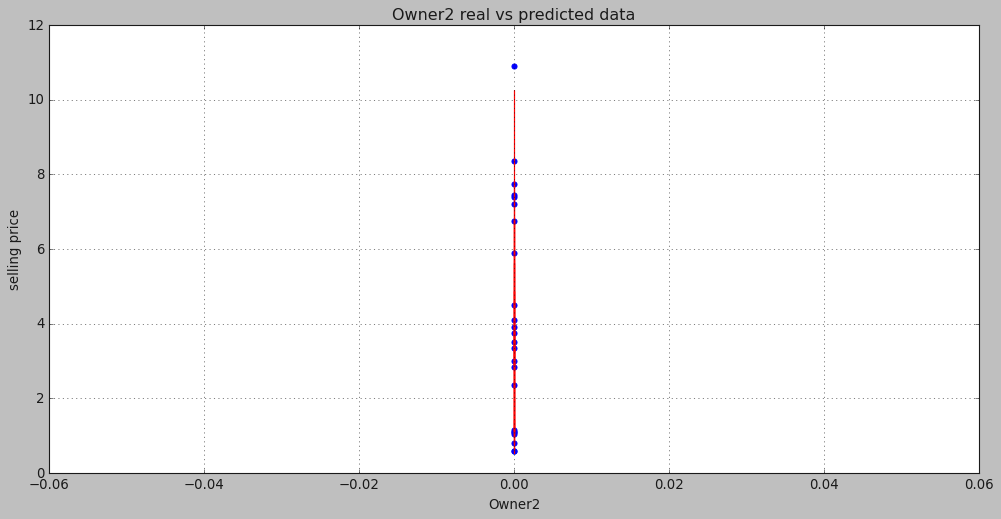

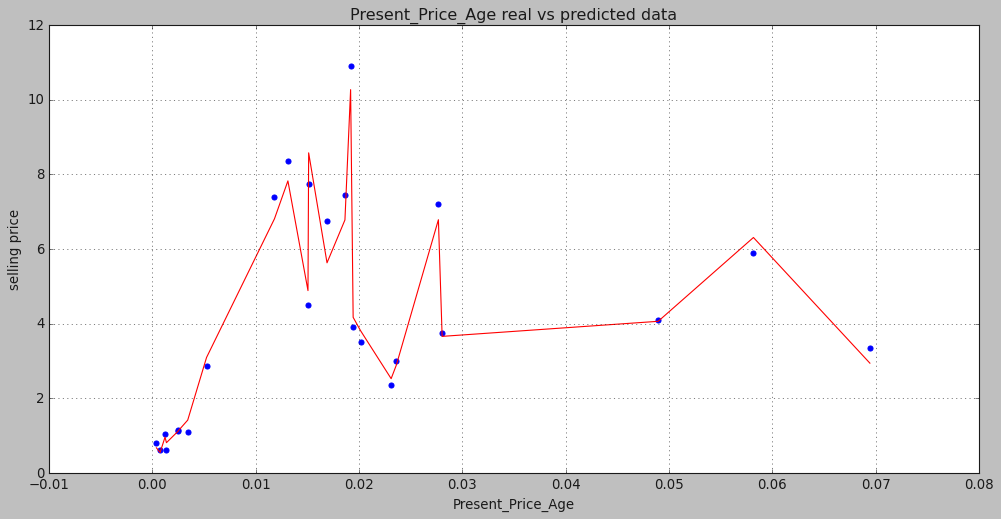

In [371]:
scatter_plot = list (x_fe2.columns)  
for col in scatter_plot:
    df4_1 = x_test.sort_values (by = [col])
    plt.figure (figsize = (15,7))
    plt.scatter (df4_1 [col] , df4_1 ["y_test"] , color = 'blue')
    plt.plot (df4_1 [col] , df4_1 ["y_pred"] , color = "red")
    plt.title (col + " real vs predicted data")
    plt.xlabel (col)
    plt.ylabel ("selling price")
    plt.grid ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Here we have regression line and real samples. In continuous features, we can see how good is our prediction. Also these plots show us there aren't any over/under fitting. </div>

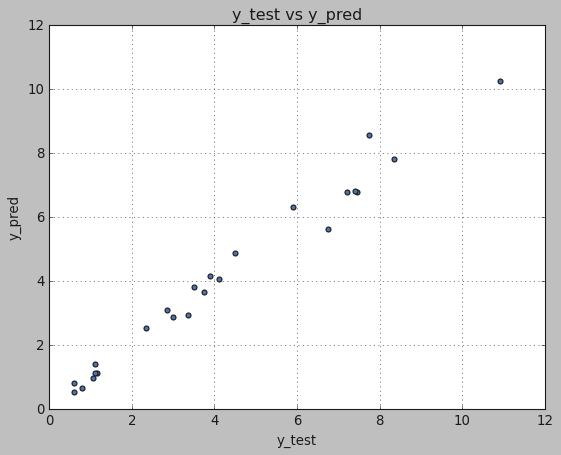

In [372]:
plt.scatter (y_test , y_pred)
plt.title ("y_test vs y_pred")
plt.xlabel ("y_test")
plt.ylabel ("y_pred")
plt.grid ()

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">In this specific plot by the range of y_test and y_pred which is somehow the same, we can ckeck our resaults. Also the strong positive correlation btw these two samples Known as a good point.  </div>

In [373]:
compare = pd.DataFrame ({"Actual" : y_test.flatten () , "Predict" : y_pred.flatten ()})
compare

,Actual,Predict
0,1.10,1.413084
1,7.75,8.571912
2,10.90,10.264776
3,0.80,0.669905
4,6.75,5.626302
5,3.90,4.165929
6,7.45,6.774592
7,7.40,6.804997
8,1.15,1.121169
9,3.50,3.806257


<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">With this data frame and the exact value of Y test and pred (actual and predicted samples), we can check the differences btw samples that our model predicted and the real values.  </div>

# <div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Predicting some samples</div>

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Finally, i want to get some feature values and predict the car price  </div>

In [374]:
# getting input
Age = float (input ("enter age of your car : "))
Present_Price =  float (input ("enter present price of your car : "))
Kms_Driven = float (input ("enter kms driven of your car : "))
Fuel_Type = float (input ("enter fuel type of your car (2 for petrol , 3 for diesel , 4 for CNG) : "))
Seller_Type = float (input ("enter seller type of your car (2 for dealer , 3 for individual) : "))
Transmission = float (input ("enter transmission of your car (2 for manual , 3 for automatic): "))
Owner = float (input ("enter owner of your car : "))

# transforming this input to data frame
sample = pd.DataFrame ({"Age" : [Age] ,
                        "Present_Price" : [Present_Price] ,
                        "Kms_Driven" : [Kms_Driven] ,
                        "Fuel_Type" : [Fuel_Type] ,
                        "Seller_Type" : [Seller_Type] , 
                        "Transmission" : [Transmission] ,
                        "Owner" : [Owner]  })
sample

enter age of your car : 10
enter present price of your car : 11.23
enter kms driven of your car : 42000
enter fuel type of your car (2 for petrol , 3 for diesel , 4 for CNG) : 2
enter seller type of your car (2 for dealer , 3 for individual) : 2
enter transmission of your car (2 for manual , 3 for automatic): 2
enter owner of your car : 1


,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10.0,11.23,42000.0,2.0,2.0,2.0,1.0


In [375]:
# our main df before normalize, cross validation and feature engineering
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


In [376]:
# adding sample to it
last_df = df.append (sample)
last_df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,3.35,5.59,27000.0,2.0,2.0,2.0,0.0
1,6.0,4.75,9.54,43000.0,3.0,2.0,2.0,0.0
2,2.0,7.25,9.85,6900.0,2.0,2.0,2.0,0.0
3,8.0,2.85,4.15,5200.0,2.0,2.0,2.0,0.0
4,5.0,4.60,6.87,42450.0,3.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...
297,4.0,4.00,5.90,60000.0,2.0,2.0,2.0,0.0
298,10.0,3.35,11.00,87934.0,2.0,2.0,2.0,0.0
299,2.0,11.50,12.50,9000.0,3.0,2.0,2.0,0.0
300,3.0,5.30,5.90,5464.0,2.0,2.0,2.0,0.0


In [377]:
# making our features to data frame
last_x = last_df.drop ("Selling_Price" , axis = 1)
last_x

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.0,5.59,27000.0,2.0,2.0,2.0,0.0
1,6.0,9.54,43000.0,3.0,2.0,2.0,0.0
2,2.0,9.85,6900.0,2.0,2.0,2.0,0.0
3,8.0,4.15,5200.0,2.0,2.0,2.0,0.0
4,5.0,6.87,42450.0,3.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
297,4.0,5.90,60000.0,2.0,2.0,2.0,0.0
298,10.0,11.00,87934.0,2.0,2.0,2.0,0.0
299,2.0,12.50,9000.0,3.0,2.0,2.0,0.0
300,3.0,5.90,5464.0,2.0,2.0,2.0,0.0


In [378]:
# checking the dimensions to creat them
x_fe2.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Present_Price2', 'Owner2',
       'Present_Price_Age'],
      dtype='object')

In [379]:
# creating the dimension which we had
new_value = last_x ["Present_Price"] ** 2
last_x.insert (7 , 'Present_Price2' , new_value)

new_value2 = last_x ["Owner"] ** 2
last_x.insert (8 , 'Owner2' , new_value2)

new_value3 = last_x ["Present_Price"] * last_x ['Age']
last_x.insert (9 , 'Present_Price_Age' , new_value3)

In [380]:
# our last features for training
last_x

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price2,Owner2,Present_Price_Age
0,5.0,5.59,27000.0,2.0,2.0,2.0,0.0,31.2481,0.0,27.95
1,6.0,9.54,43000.0,3.0,2.0,2.0,0.0,91.0116,0.0,57.24
2,2.0,9.85,6900.0,2.0,2.0,2.0,0.0,97.0225,0.0,19.70
3,8.0,4.15,5200.0,2.0,2.0,2.0,0.0,17.2225,0.0,33.20
4,5.0,6.87,42450.0,3.0,2.0,2.0,0.0,47.1969,0.0,34.35
...,...,...,...,...,...,...,...,...,...,...
297,4.0,5.90,60000.0,2.0,2.0,2.0,0.0,34.8100,0.0,23.60
298,10.0,11.00,87934.0,2.0,2.0,2.0,0.0,121.0000,0.0,110.00
299,2.0,12.50,9000.0,3.0,2.0,2.0,0.0,156.2500,0.0,25.00
300,3.0,5.90,5464.0,2.0,2.0,2.0,0.0,34.8100,0.0,17.70


In [381]:
# seprate the main data and sample
x_train = last_x [:299]
y_train = df.Selling_Price.values.reshape (-1 , 1)
x_test = last_x [299:]

# train and predict the car price
regressor = LinearRegression()
regressor.fit (x_train , y_train)
y_pred = regressor.predict (x_test)
y_pred

array([[2.98015364]])

<div style="padding: 10px; margin: 0; color: SandyBrown; font-family: Georgia, serif, serif; font-size: 120%; text-align: center; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">And here is our car price prediction with regression algorithm. 
</div>

<div style="padding: 10px; background-color: Teal; margin: 0; color: LightBlue; font-family: cursive, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">I hope you enjoyed it and thanks for your attention. </div>